In [1]:
import pandas as pd
import ptitprince as pt
import seaborn as sns
import os
import matplotlib.pyplot as plt
import numpy as np
import os
#sns.set(style="darkgrid")
#sns.set(style="whitegrid")
#sns.set_style("white")
sns.set(style="whitegrid",font_scale=2)
import matplotlib.collections as clt

In [2]:
# settings
savefigs = True
figs_dir = '/home/apheia/Documents/Skyline Study/Survey results/skyline/Figures/Efficacy'



In [3]:
df = pd.read_csv ("efficacy.csv", sep= ",")


In [4]:
df = df.rename_axis('id').reset_index()

In [5]:
# give useful column names
oricols =list(df.columns)
cols=["question"+ str(x+1) for x in range(len(oricols))]

df.columns=cols



In [13]:
oricols

['id',
 'Efficacy-1 Say how much you agree or disagree with the following statements: - Quitting smoking would lower my chances of getting heart disease.',
 'Efficacy-2 Say how much you agree or disagree with the following statements: - Quitting smoking would lower my chances of getting a permanent breathing problem.',
 'Efficacy-3 Say how much you agree or disagree with the following statements: - Quitting smoking means I reduce my chance of serious illness.',
 'Efficacy-3 Say how much you agree or disagree with the following statements: - I could easily cut down the number of cigarettes I smoke.',
 'Efficacy-4 Say how much you agree or disagree with the following statements: - If I decided to give up smoking completely in the next 6 months, Iâ€™m sure that I would succeed.']

In [6]:
df = df.rename_axis('id').reset_index()

In [14]:
df

,id,question,answer
0,0,1,0.000000
1,1,1,1.000000
2,2,1,2.000000
3,3,1,3.000000
4,4,1,4.000000
5,5,1,5.000000
6,6,1,6.000000
7,7,1,7.000000
8,8,1,8.000000
9,9,1,9.000000


In [7]:
# tidy up data frame: conversion from wide to long format
df=pd.wide_to_long(df, stubnames ="question", i="id", j="answer")

df.reset_index(inplace=True)





In [8]:
# fix column names order
new_cols=["id", "question", "answer"]
df.columns=new_cols

In [9]:
# sort by participant
#df_data.sort_values(by=['id'])

In [10]:
# Plotting
#----------------

<Figure size 432x288 with 0 Axes>

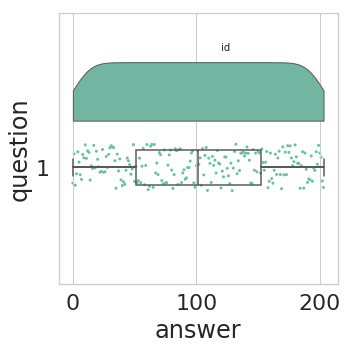

<Figure size 432x288 with 0 Axes>

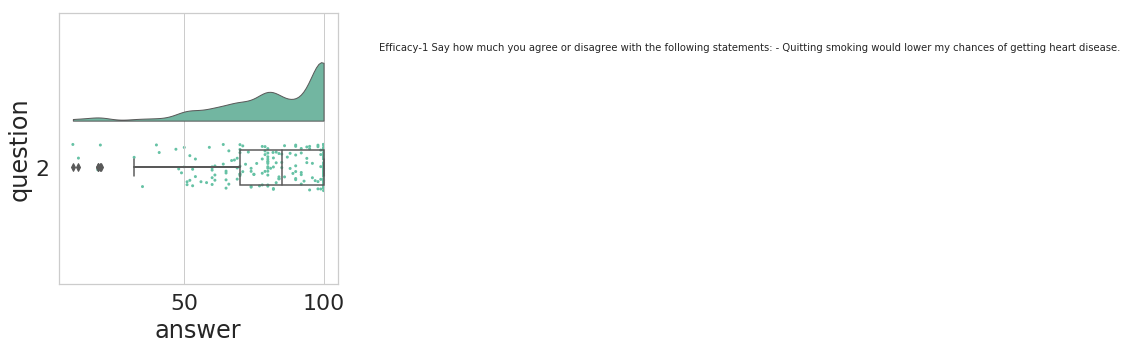

<Figure size 432x288 with 0 Axes>

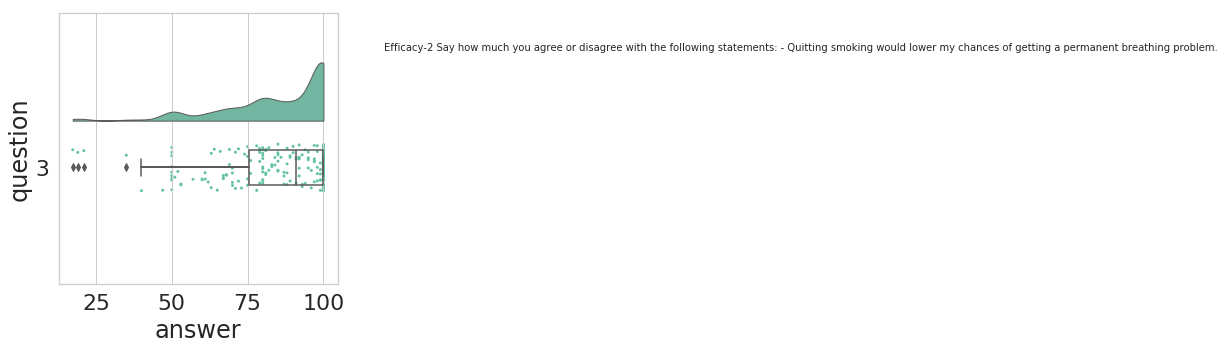

<Figure size 432x288 with 0 Axes>

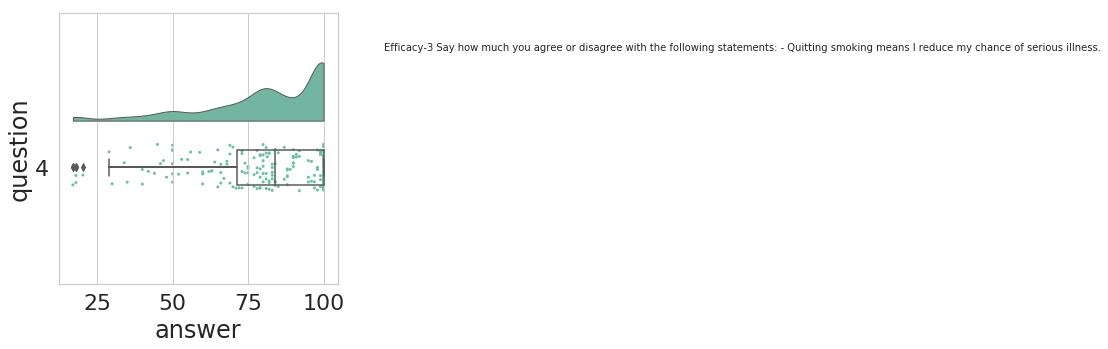

<Figure size 432x288 with 0 Axes>

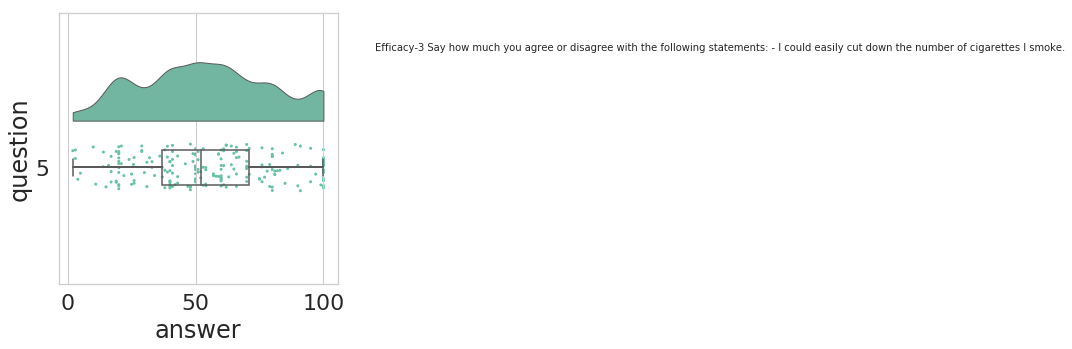

In [11]:
# plotting the clouds

#for quest in [3]:
for quest in range(1,len(np.unique(df['question']))):
    fig = plt.figure()
    # define subplot
   # ax = fig.add_subplot(5,5,quest)
    # get a subset of the dataframe corresponding to question quest
    df_plot=df.loc[df['question'] == quest]
    dx="question"; dy="answer"; ort="h"; pal = "Set2"; sigma = .2
    ax=pt.RainCloud(x = dx, y = dy, data = df_plot, palette = pal, bw = sigma,
                     width_viol = .5, figsize = (5,5), orient = ort)
    
    ax.text(120,-0.5,oricols[quest-1], wrap=True) #to account for diff number of columns in oricols and df_data
    
    #ax.text(120,0,df_comm.iloc[df_data[quest-1]], wrap=True) #to account for diff number of columns in oricols and df_data
    
    y=-0.4
   
    
    if savefigs:
        filename = 'question'+str(quest)
        plt.savefig(os.path.join(figs_dir, filename + '.jpg'), bbox_inches='tight')